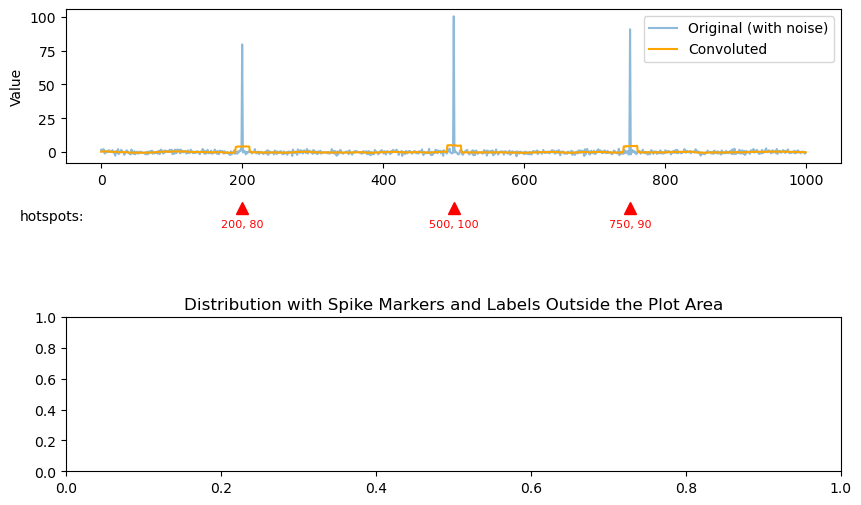

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data with spikes and added noise
np.random.seed(0)  # for reproducibility
x = np.arange(1000)  # base pairs
y = np.random.normal(0, 1, 1000)  # adding low noise around 0

# Define spike locations and values
spike_locations = [200, 500, 750]  # locations of high spikes
spike_values = [80, 100, 90]       # spike values
y[spike_locations] += spike_values   # add spike values to the noisy data

# Convolution kernel (moving average as example)
window_size = 20
kernel = np.ones(window_size) / window_size
y_convoluted = np.convolve(y, kernel, mode='same')

# Create the figure and main axis for plotting
fig, axs = plt.subplots(2,1,figsize=(10, 6))
fig.subplots_adjust(hspace=1)  # Adjust the space between the plots

# Plot the main graph with the original and convoluted data
axs[0].plot(x, y, label='Original (with noise)', alpha=0.5)
axs[0].plot(x, y_convoluted, label='Convoluted', color='orange')
axs[0].set_xlabel('Base Pair')
axs[0].set_ylabel('Value')
axs[0].legend()

# Set the title
plt.title('Distribution with Spike Markers and Labels Outside the Plot Area')

######################################################################

# what is needed to add the markers and labels:
# Get the position of the main axis
pos = axs[0].get_position()  # returns [left, bottom, width, height]
offset_new_axis = -0.1  # offset for the new axis
height_new_axis = 0.05  # width of the new axis
offset_labels = -0.07  # offset for the labels

# Create a new axis for markers, positioned below the main plot
# Adjust bottom to position the marker axis further below the main plot

marker_ax = fig.add_axes([pos.x0, pos.y0 + offset_new_axis, pos.width, height_new_axis])  # Adjust y position
marker_ax.set_xlim(axs[0].get_xlim())  # Match the x-axis limits of the main plot
# Disable the axis but keep the label
marker_ax.set_yticks([])  # Remove y-ticks
marker_ax.set_xticks([])  # Remove x-ticks
marker_ax.spines['top'].set_visible(False)  # Remove the top spine
marker_ax.spines['right'].set_visible(False)  # Remove the right spine
marker_ax.spines['left'].set_visible(False)  # Remove the left spine
marker_ax.spines['bottom'].set_visible(False)  # Remove the bottom spine

# Add the y-axis label, make it horizontal
marker_ax.set_ylabel('hotspots:', fontsize=10, color='black', rotation=0, labelpad=10, y=0)

# Plot markers and labels on the separate axis, well below the main plot
for loc, val in zip(spike_locations, spike_values):
    marker_ax.plot(loc, 0, '^', color='red', markersize=8)  # Marker shifted further down
    marker_ax.text(loc, offset_labels, f'{loc}, {val}', ha='center', color='red', fontsize=8)

plt.show()
